# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of customer feedback tweets around various technologi firms</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of customer feedback tweets. The tweets are around products from different technology firms and their crresponding customer services.The tweets have been pulled from Twitter and manual tagging has been done then.


### You are given the following information:
1. ID
2. Tweet
4. Label

   (a. 0 - Positive Sentiment
   b. 1 - negative Sentiments)

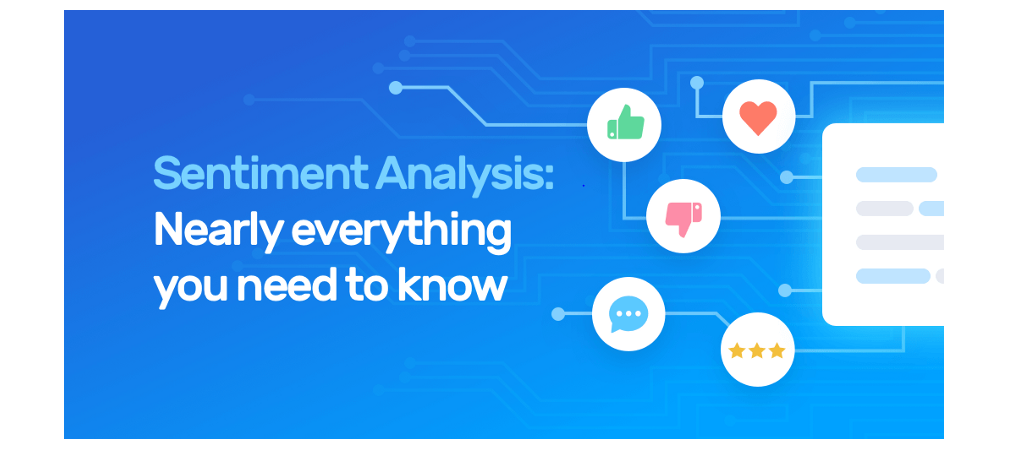

# Workflow

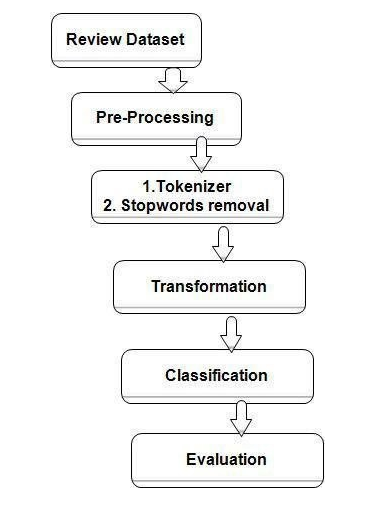

In [655]:
import pandas as pd
import numpy as np

In [656]:
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
import gensim
#from gensim.models.doc2vec import LabeledSentence
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [657]:
#loading the training data
df_train=pd.read_csv("train_2kmZucJ.csv")
df_train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [658]:
#loading the test data
df_test=pd.read_csv("test_oJQbWVk.csv")
test_data=pd.read_csv("test_oJQbWVk.csv")
df_test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for


In [659]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
id       7920 non-null int64
label    7920 non-null int64
tweet    7920 non-null object
dtypes: int64(2), object(1)
memory usage: 185.7+ KB


In [660]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 2 columns):
id       1953 non-null int64
tweet    1953 non-null object
dtypes: int64(1), object(1)
memory usage: 30.6+ KB


In [661]:
df_train.label.unique()

array([0, 1], dtype=int64)

In [662]:
df_train['label'].isnull().sum()

0

In [663]:
df_train['tweet'].isnull().sum()

0

In [664]:
df_test['tweet'].isnull().sum()

0

### Removing @user from the tweets

In [665]:
#definition of the function defined for removing @user
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern, input_txt)
    for i in r:
        input_txt=re.sub(i,'', input_txt)
    return input_txt

In [666]:
#removing @user from the tweets of training data
df_train["tweet_wo_user"]= np.vectorize(remove_pattern)(df_train["tweet"],'@[\w]*')
df_train.head()

,id,label,tweet,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [667]:
#removing @user from the tweets of test data
df_test["tweet_wo_user"]= np.vectorize(remove_pattern)(df_test["tweet"],'@[\w]*')
df_test.head()

,id,tweet,tweet_wo_user
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n","I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing","My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night! I only want the music I $&*# paid for


### Removing HTTP and URLs from tweets 

In [668]:
#for training data
import re
df_train["tweet_wo_user"]=df_train["tweet_wo_user"].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
df_train.head()

,id,label,tweet,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [669]:
#for test data
df_test["tweet_wo_user"]=df_test["tweet_wo_user"].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
df_test.head()

,id,tweet,tweet_wo_user
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n","I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing","My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night! I only want the music I $&*# paid for


### Removing shot words

In [670]:
#remove shot words
#df_train["tweet_wo_user"]= df_train["tweet_wo_user"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
#df_train.head()

### removing Accented caharacters

In [671]:
import unicodedata
#definition of the function
def remove_accented_chars(input_txt):
    input_txt=unicodedata.normalize("NFKD", input_txt).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return input_txt

In [672]:
#remove_accented_chars('Sómě Áccěntěd těxt')

In [673]:
#for training data
df_train['tweet_wo_user']=np.vectorize(remove_accented_chars)(df_train["tweet_wo_user"])
df_train.head()

,id,label,tweet,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [674]:
#for test data
df_test['tweet_wo_user']=np.vectorize(remove_accented_chars)(df_test["tweet_wo_user"])
df_test.head()

,id,tweet,tweet_wo_user
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n","I'd like to puts some CD-ROMS on my iPad, is that possible?' Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing","My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night! I only want the music I $&*# paid for


### Expanding Contractions

In [675]:
from contractions import CONTRACTION_MAP

def expand_contractions(input_txt, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, input_txt)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [676]:
#for training data
df_train["tweet_wo_user"]=np.vectorize(expand_contractions)(df_train["tweet_wo_user"])
df_train.head()

,id,label,tweet,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I am wired I know I am George I was made that way ;) #iphone #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple will not even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [677]:
#for test data
df_test["tweet_wo_user"]=np.vectorize(expand_contractions)(df_test["tweet_wo_user"])
df_test.head()

,id,tweet,tweet_wo_user
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new #iphone upgrade. Will not let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n","I would like to puts some CD-ROMS on my iPad, is that possible? Yes, but would not that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing","My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night! I only want the music I $&*# paid for


## Removing Specal characters, Punctuations and Numbers 

In [678]:
#Removing special characters, punctuations and numbers from training data
df_train["tweet_wo_user"]=df_train["tweet_wo_user"].str.replace('[^a-zA-Z#]+',' ')
df_train.head()

,id,label,tweet,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I am wired I know I am George I was made that way #iphone #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple will not even talk to me about a question I have unless I pay them for their stupid support


In [679]:
#Removing special characters, punctuations and numbers from test data
df_test["tweet_wo_user"]=df_test["tweet_wo_user"].str.replace('[^a-zA-Z#]+',' ')
df_test.head()

,id,tweet,tweet_wo_user
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new #iphone upgrade Will not let me download apps #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting my fucking pants #apple #iMac #cashmoney #raddest #swagswagswag
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n",I would like to puts some CD ROMS on my iPad is that possible Yes but would not that block the screen
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing",My ipod is officially dead I lost all my pictures and videos from the D and sos concert and from Vet Camp #hatinglife #sobbing
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night I only want the music I # paid for


### Tokenization

In [680]:
#Creating new field called "tokenized tweet" in training dataset
tokenized_tweet= df_train["tweet_wo_user"].apply(lambda x: x.split())
df_train.head()

,id,label,tweet,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I am wired I know I am George I was made that way #iphone #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple will not even talk to me about a question I have unless I pay them for their stupid support


In [681]:
print(tokenized_tweet)

0                                                              [#fingerprint, #Pregnancy, Test, https, goo, gl, h, MfQV, #android, #apps, #beautiful, #cute, #health, #igers, #iphoneonly, #iphonesia, #iphone]
1                                                                                                      [Finally, a, transparant, silicon, case, Thanks, to, my, uncle, #yay, #Sony, #Xperia, #S, #sonyexperias]
2                                                                                                [We, love, this, Would, you, go, #talk, #makememories, #unplug, #relax, #iphone, #smartphone, #wifi, #connect]
3                                                                                                             [I, am, wired, I, know, I, am, George, I, was, made, that, way, #iphone, #cute, #daventry, #home]
4                                                                [What, amazing, service, Apple, will, not, even, talk, to, me, about, a, question, I, have, unless, I, 

In [682]:
#Creating new field called "tokenized tweet" in test dataset
tokenized_tweet1= df_test["tweet_wo_user"].apply(lambda x: x.split())
df_test.head()

,id,tweet,tweet_wo_user
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new #iphone upgrade Will not let me download apps #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting my fucking pants #apple #iMac #cashmoney #raddest #swagswagswag
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n",I would like to puts some CD ROMS on my iPad is that possible Yes but would not that block the screen
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing",My ipod is officially dead I lost all my pictures and videos from the D and sos concert and from Vet Camp #hatinglife #sobbing
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night I only want the music I # paid for


### Lemmatization

In [683]:
#for training dataset
from nltk.stem import WordNetLemmatizer
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lam_text = ' '.join([lemmatizer.lemmatize(w) for w in text])
    return lam_text

tokenized_tweet=tokenized_tweet.apply(lambda x: [lemmatize_text(x)])
df_train.head()

,id,label,tweet,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I am wired I know I am George I was made that way #iphone #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple will not even talk to me about a question I have unless I pay them for their stupid support


In [684]:
print(tokenized_tweet)

0                                                                               [#fingerprint #Pregnancy Test http goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone]
1                                                                                                                   [Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias]
2                                                                                                             [We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect]
3                                                                                                                              [I am wired I know I am George I wa made that way #iphone #cute #daventry #home]
4                                                                                      [What amazing service Apple will not even talk to me about a question I have unle

In [685]:
#for test dataset
from nltk.stem import WordNetLemmatizer
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lam_text = ' '.join([lemmatizer.lemmatize(w) for w in text])
    return lam_text

tokenized_tweet1=tokenized_tweet1.apply(lambda x: [lemmatize_text(x)])
df_test.head()

,id,tweet,tweet_wo_user
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new #iphone upgrade Will not let me download apps #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting my fucking pants #apple #iMac #cashmoney #raddest #swagswagswag
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n",I would like to puts some CD ROMS on my iPad is that possible Yes but would not that block the screen
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing",My ipod is officially dead I lost all my pictures and videos from the D and sos concert and from Vet Camp #hatinglife #sobbing
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night I only want the music I # paid for


In [686]:
print(tokenized_tweet1)

0                                                                                                                               [I hate the new #iphone upgrade Will not let me download apps #ugh #apple suck]
1                                                                                                                           [currently shitting my fucking pant #apple #iMac #cashmoney #raddest #swagswagswag]
2                                                                                                        [I would like to put some CD ROMS on my iPad is that possible Yes but would not that block the screen]
3                                                                                 [My ipod is officially dead I lost all my picture and video from the D and so concert and from Vet Camp #hatinglife #sobbing]
4                                                                                                                                           [Been fighting iTunes all ni

In [687]:
# join tokens into one sentence for training data
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [688]:
# join tokens into one sentence for test data
for i in range(len(tokenized_tweet1)):
    tokenized_tweet1[i] = ' '.join(tokenized_tweet1[i])

In [689]:
# assign tokenized_tweet to "tweet_wo_user" of training data
df_train['tweet_wo_user']=tokenized_tweet
df_train.head()

,id,label,tweet,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test http goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I am wired I know I am George I wa made that way #iphone #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple will not even talk to me about a question I have unless I pay them for their stupid support


In [690]:
# assign tokenized_tweet1 to "tweet_wo_user" of test data
df_test['tweet_wo_user']=tokenized_tweet1
df_test.head()

,id,tweet,tweet_wo_user
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new #iphone upgrade Will not let me download apps #ugh #apple suck
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting my fucking pant #apple #iMac #cashmoney #raddest #swagswagswag
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n",I would like to put some CD ROMS on my iPad is that possible Yes but would not that block the screen
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing",My ipod is officially dead I lost all my picture and video from the D and so concert and from Vet Camp #hatinglife #sobbing
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night I only want the music I # paid for


### Understanding the impact of Hastags on tweets sentiment

In [691]:
#function to extract hastags
def hashtag_extract(x):
    hashtags= []
    for i in x:
        ht=re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [692]:
#extracting hashtags from non racist/sexit tweets
Ht_Positive=hashtag_extract(df_train['tweet_wo_user'][df_train['label']==0])
Ht_Negative=hashtag_extract(df_train['tweet_wo_user'][df_train['label']==1])

# unnesting list
Ht_Positive = sum(Ht_Positive, [])
Ht_Negative = sum(Ht_Negative, [])

In [693]:
#Printing the positive Hashtags
print(Ht_Positive)

['fingerprint', 'Pregnancy', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'yay', 'Sony', 'Xperia', 'S', 'sonyexperias', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'iphone', 'cute', 'daventry', 'home', 'instapic', 'instadaily', 'us', 'sony', 'xperia', 'xperiaZ', 'UK', 'iphone', 'justme', 'music', 'likeforlike', 'followforfollow', 'fun', 'selfie', 'pool', 'water', 'sony', 'camera', 'picoftheday', 'sun', 'instagood', 'boy', 'cute', 'outdoor', 'iPad', 'Apple', 'Shopping', 'DeepEllum', 'downtown', 'Dallas', 'BigD', 'Saturday', 'RX', 'Sony', 'summer', 'urban', 'iphone', 's', 'iphonesia', 'iphone', 'instagood', 'instagram', 'photooftheday', 'tweegram', 'Apple', 'Art', 'Easter', 'Dear', 'Friends', 'wife', 'bake', 'an', 'apple', 'pie', 'yay', 'phone', 'wallpapers', 'wall', 'screen', 'galaxy', 'samsung', 'app', 'apple', 'flower', 'green', 'diamond', 'pearls', 'cute', 'new', 'iphone', 'iphone', 'case', '

In [694]:
#Printing the negative Hashtags
print(Ht_Negative)

['apple', 'drinkyourhaterade', 'Cellcom', 'depressing', 'IDontWantTo', 'HateOrange', 'iphone', 'suck', 'apple', 'truth', 'truthbetold', 'agree', 'fact', 'realitycheck', 'blackberrypic', 'fuckingpissed', 'Apple', 'MyLoss', 'Apple', 'SoAngry', 'HATEApple', 'Apple', 'iTunes', 'iphone', 'Apple', 'sorry', 'apple', 'tech', 'win', 'getAlife', 'apple', 'tecShit', 'fuckYou', 'Apple', 'anotherAngryCustomer', 'Apple', 'hater', 'yousuck', 'briantong', 'easytotalk', 'producesomething', 'Korean', 'loser', 'Sony', 'apple', 'iOS', 'yosemite', 'apple', 'updates', 'fuckyou', 'sony', 'ps', 'sodepressed', 'samsunggalaxyftw', 'loljk', 'apple', 'usefuckingtorrent', 'apple', 'iphones', 'samsung', 'Apple', 'getbetterbatteries', 'GeniusBar', 'Apple', 'customercare', 'batteries', 'shitbirds', 'colbertreport', 'apple', 'iwatch', 'apple', 'iphone', 'iphone', 'Apple', 'Apple', 'suck', 'update', 'OS', 'disable', 'apps', 'Customer', 'android', 'disappointed', 'dissatisfied', 'Apple', 'iPhone', 'incasearmband', 'fuck

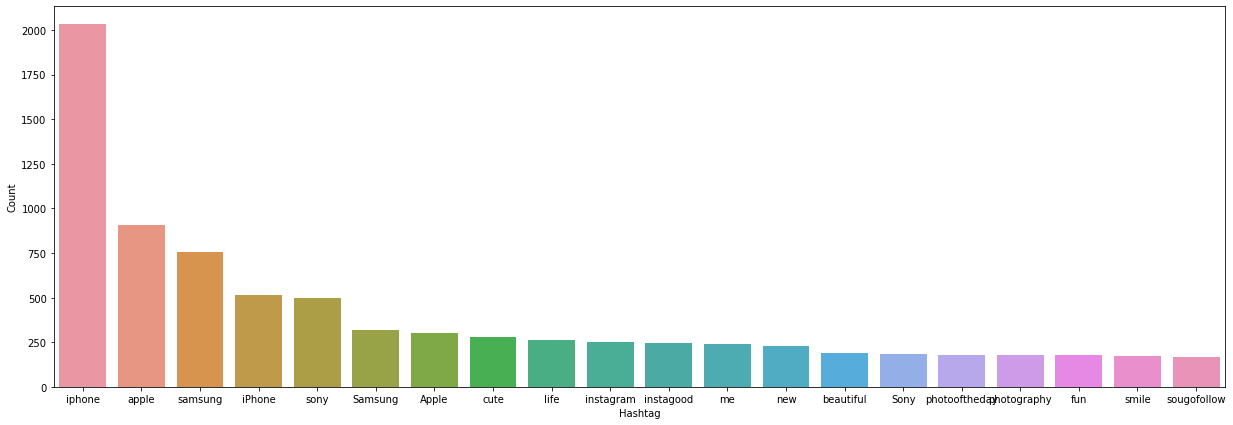

In [695]:
# making frequency distribution top 20 Positive hashtags
a= nltk.FreqDist(Ht_Positive)
d= pd.DataFrame({'Hashtag':list(a.keys()),
                'Count': list(a.values())})

d=d.nlargest(n=20,columns='Count')
plt.figure(figsize=(21,7))
ax=sns.barplot(x='Hashtag', y='Count',data=d)
plt.show()

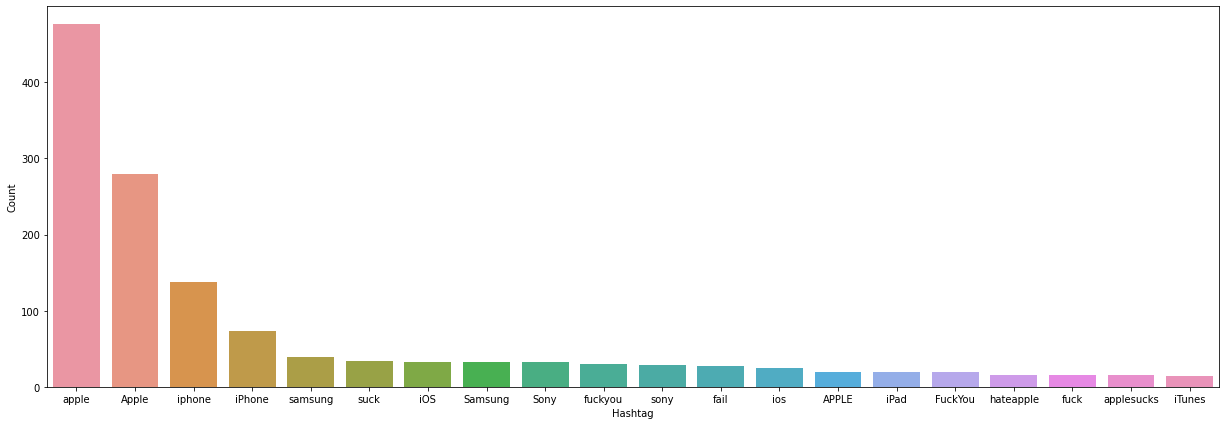

In [696]:
# making frequency distribution top 20 Positive hashtags
a_n= nltk.FreqDist(Ht_Negative)
d_n= pd.DataFrame({'Hashtag':list(a_n.keys()),
                'Count': list(a_n.values())})

d_n=d_n.nlargest(n=20,columns='Count')
plt.figure(figsize=(21,7))
ax=sns.barplot(x='Hashtag', y='Count',data=d_n)
plt.show()

### Removing Stopwords

In [697]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KRISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [698]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [699]:
#for trining data
df_train['tweet_wo_user'].apply(lambda x: [item for item in x if item not in stop])

0       [#, f, n, g, e, r, p, r, n,  , #, P, r, e, g, n, n, c,  , T, e,  , h, p,  , g,  , g, l,  , h,  , M, f, Q, V,  , #, n, r,  , #, p, p,  , #, b, e, u, f, u, l,  , #, c, u, e,  , #, h, e, l, h,  , #, ...
1                                            [F, n, l, l,  ,  , r, n, p, r, n,  , l, c, n,  , c, e,  , T, h, n, k,  ,  ,  , u, n, c, l, e,  , #,  , #, S, n,  , #, X, p, e, r,  , #, S,  , #, n, e, x, p, e, r]
2           [W, e,  , l, v, e,  , h,  , W, u, l,  , u,  , g,  , #, l, k,  , #, k, e, e, r, e,  , #, u, n, p, l, u, g,  , #, r, e, l, x,  , #, p, h, n, e,  , #, r, p, h, n, e,  , #, w, f,  , #, c, n, n, e, c]
3                                                  [I,  ,  , w, r, e,  , I,  , k, n, w,  , I,  ,  , G, e, r, g, e,  , I,  , w,  , e,  , h,  , w,  , #, p, h, n, e,  , #, c, u, e,  , #, v, e, n, r,  , #, h, e]
4       [W, h,  , z, n, g,  , e, r, v, c, e,  , A, p, p, l, e,  , w, l, l,  , n,  , e, v, e, n,  , l, k,  ,  , e,  , b, u,  ,  , q, u, e, n,  , I,  , h, v, e,  , u, n, 

In [700]:
df_train.head()

,id,label,tweet,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test http goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I am wired I know I am George I wa made that way #iphone #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple will not even talk to me about a question I have unless I pay them for their stupid support


In [701]:
#for test data
df_test['tweet_wo_user'].apply(lambda x: [item for item in x if item not in stop])

0                                      [I,  , h, e,  , h, e,  , n, e, w,  , #, p, h, n, e,  , u, p, g, r, e,  , W, l, l,  , n,  , l, e,  , e,  , w, n, l,  , p, p,  , #, u, g, h,  , #, p, p, l, e,  , u, c, k]
1                                                        [c, u, r, r, e, n, l,  , h, n, g,  ,  , f, u, c, k, n, g,  , p, n,  , #, p, p, l, e,  , #, M, c,  , #, c, h, n, e,  , #, r, e,  , #, w, g, w, g, w, g]
2              [I,  , w, u, l,  , l, k, e,  ,  , p, u,  , e,  , C, D,  , R, O, M, S,  , n,  ,  , P,  ,  , h,  , p, b, l, e,  , Y, e,  , b, u,  , w, u, l,  , n,  , h,  , b, l, c, k,  , h, e,  , c, r, e, e, n]
3       [M,  , p,  ,  , f, f, c, l, l,  , e,  , I,  , l,  , l, l,  ,  , p, c, u, r, e,  , n,  , v, e,  , f, r,  , h, e,  , D,  , n,  ,  , c, n, c, e, r,  , n,  , f, r,  , V, e,  , C, p,  , #, h, n, g, l, ...
4                                                                       [B, e, e, n,  , f, g, h, n, g,  , T, u, n, e,  , l, l,  , n, g, h,  , I,  , n, l,  , w, n,  , h,

In [702]:
df_test.head()

,id,tweet,tweet_wo_user
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new #iphone upgrade Will not let me download apps #ugh #apple suck
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting my fucking pant #apple #iMac #cashmoney #raddest #swagswagswag
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n",I would like to put some CD ROMS on my iPad is that possible Yes but would not that block the screen
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing",My ipod is officially dead I lost all my picture and video from the D and so concert and from Vet Camp #hatinglife #sobbing
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night I only want the music I # paid for


In [703]:
#dropping the "tweet" column in training dataset
df_train.drop("tweet",axis=1)

,id,label,tweet_wo_user
0,1,0,#fingerprint #Pregnancy Test http goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias
2,3,0,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
3,4,0,I am wired I know I am George I wa made that way #iphone #cute #daventry #home
4,5,1,What amazing service Apple will not even talk to me about a question I have unless I pay them for their stupid support
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones
6,7,0,Happy for u #instapic #instadaily #us #sony #xperia #xperiaZ http instagram com p z qGfWlvj
7,8,0,New Type C charger cable #UK
8,9,0,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollow
9,10,0,Photo #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor


In [704]:
#dropping the "tweet" column in test dataset
df_test.drop("tweet",axis=1)

,id,tweet_wo_user
0,7921,I hate the new #iphone upgrade Will not let me download apps #ugh #apple suck
1,7922,currently shitting my fucking pant #apple #iMac #cashmoney #raddest #swagswagswag
2,7923,I would like to put some CD ROMS on my iPad is that possible Yes but would not that block the screen
3,7924,My ipod is officially dead I lost all my picture and video from the D and so concert and from Vet Camp #hatinglife #sobbing
4,7925,Been fighting iTunes all night I only want the music I # paid for
5,7926,#Repost with repostapp to announce we will have our #apple #bourbon http www instagram com p BK okHOgWSS
6,7927,This new apple software update is really doing thing to my phone Bad thing apple
7,7928,BABY #iPhone #iphone s #gold #new #apple #appleisbest # GB #gegonnt #aaaaah http www instagram com p BAUx eQtKez
8,7929,I am confused why did I have to take the time to set a appointment To still be waiting her minute after the fact
9,7930,Fruit just taste better when you pick it yourself #apple #healthy #fruit #nyc by


In [705]:
#renaming the column "tweet_wo_user" to "tweet"
df_train['tweet']=df_train['tweet_wo_user']
#dropping 'id" column as well
df_train = df_train.drop('id', axis=1)
#dropping "tweet_wo_user"column
df_train = df_train.drop('tweet_wo_user', axis=1)
df_train.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test http goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias
2,0,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
3,0,I am wired I know I am George I wa made that way #iphone #cute #daventry #home
4,1,What amazing service Apple will not even talk to me about a question I have unless I pay them for their stupid support


In [706]:
#renaming the column "tweet_wo_user" to "tweet" in test dataset
df_test['tweet']=df_test['tweet_wo_user']
#dropping 'id" column as well in test dataset
df_test = df_test.drop('id', axis=1)
#dropping "tweet_wo_user"column in test dataset
df_test = df_test.drop('tweet_wo_user', axis=1)
df_test.head()

,tweet
0,I hate the new #iphone upgrade Will not let me download apps #ugh #apple suck
1,currently shitting my fucking pant #apple #iMac #cashmoney #raddest #swagswagswag
2,I would like to put some CD ROMS on my iPad is that possible Yes but would not that block the screen
3,My ipod is officially dead I lost all my picture and video from the D and so concert and from Vet Camp #hatinglife #sobbing
4,Been fighting iTunes all night I only want the music I # paid for


In [707]:
#converting everything into lower case for training data
#df_train["tweet"] = df_train["tweet"].str.lower()

In [708]:
#converting everything into lower case for test data
#df_test["tweet"] = df_test["tweet"].str.lower()

In [709]:
#count of "positives" and "negatives" 
df_train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [710]:
df_train.isnull().sum()

label    0
tweet    0
dtype: int64

## Spitting Our Dataset into Training And Testing Dataset

In [711]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df_train,test_size = 0.3,random_state=0,stratify = df_train['label'].values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)
print(type(valid))

train shape :  (5544, 2)
valid shape :  (2376, 2)
<class 'pandas.core.frame.DataFrame'>


## Using count vectorizer

In [712]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error='replace', stop_words= stop)

X_train=vectorizer.fit_transform(train['tweet'].values)
X_valid=vectorizer.transform(valid['tweet'].values)

y_train=train['label'].values
y_valid=valid['label'].values

print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (5544, 13299)
X_valid.shape :  (2376, 13299)
y_train.shape :  (5544,)
y_valid.shape :  (2376,)


In [713]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [714]:
df_test=vectorizer.transform(df_test.tweet.values)

## NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION

In [715]:
#using the values of the hyperparameters that we have achieved below
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB(alpha=0.001,class_prior=[0.86,0.9])

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.9543650793650794
Validation accuracy Score :  0.8526936026936027
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1606
           1       0.85      0.67      0.75       770

    accuracy                           0.85      2376
   macro avg       0.85      0.80      0.82      2376
weighted avg       0.85      0.85      0.85      2376



## RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [716]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9992784992784993
Validation accuracy Score :  0.8535353535353535
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1936
           1       0.58      0.80      0.67       440

    accuracy                           0.85      2376
   macro avg       0.76      0.83      0.79      2376
weighted avg       0.88      0.85      0.86      2376



## LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [717]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print(pd.DataFrame([X_valid,logreg_prediction]).transpose())
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9722222222222222
                                                                                                                                                                                                         0  \
0    (0, 475)\t1\n  (0, 1566)\t1\n  (0, 1919)\t1\n  (0, 3074)\t1\n  (0, 3206)\t1\n  (0, 5627)\t1\n  (0, 5662)\t1\n  (0, 5681)\t1\n  (0, 7976)\t1\n  (0, 10790)\t1\n  (0, 11380)\t1\n  (0, 12845)\t1\n  ...   

                                                                                                                                                                                                         1  
0  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...  
Validation accuracy Score :  0.8758417508417509
              precision    recall  f1-score   support

           0       0.94  

## CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [718]:
from catboost import CatBoostClassifier
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid))

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

Learning rate set to 0.048376
0:	learn: 0.6674350	test: 0.6675618	best: 0.6675618 (0)	total: 329ms	remaining: 5m 28s
1:	learn: 0.6416484	test: 0.6421481	best: 0.6421481 (1)	total: 456ms	remaining: 3m 47s
2:	learn: 0.6221106	test: 0.6229421	best: 0.6229421 (2)	total: 539ms	remaining: 2m 59s
3:	learn: 0.6038256	test: 0.6048213	best: 0.6048213 (3)	total: 635ms	remaining: 2m 38s
4:	learn: 0.5858012	test: 0.5870102	best: 0.5870102 (4)	total: 709ms	remaining: 2m 21s
5:	learn: 0.5706930	test: 0.5721788	best: 0.5721788 (5)	total: 762ms	remaining: 2m 6s
6:	learn: 0.5624174	test: 0.5641247	best: 0.5641247 (6)	total: 817ms	remaining: 1m 55s
7:	learn: 0.5496756	test: 0.5521113	best: 0.5521113 (7)	total: 872ms	remaining: 1m 48s
8:	learn: 0.5420397	test: 0.5443081	best: 0.5443081 (8)	total: 928ms	remaining: 1m 42s
9:	learn: 0.5331404	test: 0.5360138	best: 0.5360138 (9)	total: 985ms	remaining: 1m 37s
10:	learn: 0.5238051	test: 0.5270545	best: 0.5270545 (10)	total: 1.04s	remaining: 1m 33s
11:	learn: 0

95:	learn: 0.3577630	test: 0.3788533	best: 0.3788533 (95)	total: 6.03s	remaining: 56.8s
96:	learn: 0.3564009	test: 0.3777523	best: 0.3777523 (96)	total: 6.09s	remaining: 56.7s
97:	learn: 0.3556807	test: 0.3772019	best: 0.3772019 (97)	total: 6.16s	remaining: 56.7s
98:	learn: 0.3549417	test: 0.3767190	best: 0.3767190 (98)	total: 6.22s	remaining: 56.6s
99:	learn: 0.3545350	test: 0.3763222	best: 0.3763222 (99)	total: 6.27s	remaining: 56.4s
100:	learn: 0.3541401	test: 0.3758699	best: 0.3758699 (100)	total: 6.33s	remaining: 56.3s
101:	learn: 0.3535699	test: 0.3754148	best: 0.3754148 (101)	total: 6.38s	remaining: 56.2s
102:	learn: 0.3531148	test: 0.3749504	best: 0.3749504 (102)	total: 6.43s	remaining: 56s
103:	learn: 0.3525059	test: 0.3744614	best: 0.3744614 (103)	total: 6.48s	remaining: 55.9s
104:	learn: 0.3521098	test: 0.3743756	best: 0.3743756 (104)	total: 6.54s	remaining: 55.7s
105:	learn: 0.3514021	test: 0.3740137	best: 0.3740137 (105)	total: 6.59s	remaining: 55.6s
106:	learn: 0.3510492	

187:	learn: 0.3135174	test: 0.3483327	best: 0.3483327 (187)	total: 11.1s	remaining: 47.9s
188:	learn: 0.3131893	test: 0.3480827	best: 0.3480827 (188)	total: 11.1s	remaining: 47.8s
189:	learn: 0.3128320	test: 0.3479482	best: 0.3479482 (189)	total: 11.2s	remaining: 47.7s
190:	learn: 0.3123465	test: 0.3475278	best: 0.3475278 (190)	total: 11.2s	remaining: 47.6s
191:	learn: 0.3118634	test: 0.3472265	best: 0.3472265 (191)	total: 11.3s	remaining: 47.5s
192:	learn: 0.3113603	test: 0.3468824	best: 0.3468824 (192)	total: 11.3s	remaining: 47.4s
193:	learn: 0.3109048	test: 0.3466873	best: 0.3466873 (193)	total: 11.4s	remaining: 47.3s
194:	learn: 0.3106115	test: 0.3466065	best: 0.3466065 (194)	total: 11.4s	remaining: 47.2s
195:	learn: 0.3101519	test: 0.3462819	best: 0.3462819 (195)	total: 11.5s	remaining: 47.1s
196:	learn: 0.3096980	test: 0.3460244	best: 0.3460244 (196)	total: 11.5s	remaining: 47.1s
197:	learn: 0.3092720	test: 0.3457247	best: 0.3457247 (197)	total: 11.6s	remaining: 47s
198:	learn: 

281:	learn: 0.2794329	test: 0.3317808	best: 0.3317808 (281)	total: 16.2s	remaining: 41.1s
282:	learn: 0.2791341	test: 0.3315498	best: 0.3315498 (282)	total: 16.2s	remaining: 41.1s
283:	learn: 0.2790277	test: 0.3315246	best: 0.3315246 (283)	total: 16.3s	remaining: 41s
284:	learn: 0.2785615	test: 0.3312348	best: 0.3312348 (284)	total: 16.3s	remaining: 40.9s
285:	learn: 0.2784209	test: 0.3312428	best: 0.3312348 (284)	total: 16.4s	remaining: 40.8s
286:	learn: 0.2783112	test: 0.3312466	best: 0.3312348 (284)	total: 16.4s	remaining: 40.8s
287:	learn: 0.2782044	test: 0.3312501	best: 0.3312348 (284)	total: 16.5s	remaining: 40.7s
288:	learn: 0.2778552	test: 0.3310432	best: 0.3310432 (288)	total: 16.5s	remaining: 40.6s
289:	learn: 0.2777546	test: 0.3310456	best: 0.3310432 (288)	total: 16.6s	remaining: 40.6s
290:	learn: 0.2775831	test: 0.3309917	best: 0.3309917 (290)	total: 16.6s	remaining: 40.5s
291:	learn: 0.2772183	test: 0.3308999	best: 0.3308999 (291)	total: 16.7s	remaining: 40.4s
292:	learn: 

373:	learn: 0.2577891	test: 0.3232797	best: 0.3232761 (372)	total: 21.2s	remaining: 35.4s
374:	learn: 0.2574790	test: 0.3232678	best: 0.3232678 (374)	total: 21.2s	remaining: 35.4s
375:	learn: 0.2573943	test: 0.3232326	best: 0.3232326 (375)	total: 21.3s	remaining: 35.3s
376:	learn: 0.2573110	test: 0.3232360	best: 0.3232326 (375)	total: 21.3s	remaining: 35.2s
377:	learn: 0.2570530	test: 0.3231253	best: 0.3231253 (377)	total: 21.4s	remaining: 35.2s
378:	learn: 0.2569736	test: 0.3231120	best: 0.3231120 (378)	total: 21.4s	remaining: 35.1s
379:	learn: 0.2567563	test: 0.3230568	best: 0.3230568 (379)	total: 21.5s	remaining: 35s
380:	learn: 0.2566414	test: 0.3229708	best: 0.3229708 (380)	total: 21.5s	remaining: 35s
381:	learn: 0.2565608	test: 0.3229729	best: 0.3229708 (380)	total: 21.6s	remaining: 34.9s
382:	learn: 0.2563073	test: 0.3228986	best: 0.3228986 (382)	total: 21.6s	remaining: 34.9s
383:	learn: 0.2562252	test: 0.3229022	best: 0.3228986 (382)	total: 21.7s	remaining: 34.8s
384:	learn: 0.

468:	learn: 0.2417207	test: 0.3176427	best: 0.3176045 (465)	total: 26.1s	remaining: 29.6s
469:	learn: 0.2414787	test: 0.3176212	best: 0.3176045 (465)	total: 26.2s	remaining: 29.5s
470:	learn: 0.2411606	test: 0.3176089	best: 0.3176045 (465)	total: 26.3s	remaining: 29.5s
471:	learn: 0.2409139	test: 0.3175180	best: 0.3175180 (471)	total: 26.3s	remaining: 29.4s
472:	learn: 0.2408446	test: 0.3175216	best: 0.3175180 (471)	total: 26.4s	remaining: 29.4s
473:	learn: 0.2407763	test: 0.3175115	best: 0.3175115 (473)	total: 26.4s	remaining: 29.3s
474:	learn: 0.2406052	test: 0.3175150	best: 0.3175115 (473)	total: 26.5s	remaining: 29.2s
475:	learn: 0.2405015	test: 0.3175202	best: 0.3175115 (473)	total: 26.5s	remaining: 29.2s
476:	learn: 0.2401792	test: 0.3171717	best: 0.3171717 (476)	total: 26.6s	remaining: 29.1s
477:	learn: 0.2400430	test: 0.3171476	best: 0.3171476 (477)	total: 26.6s	remaining: 29.1s
478:	learn: 0.2399747	test: 0.3171288	best: 0.3171288 (478)	total: 26.7s	remaining: 29s
479:	learn: 

563:	learn: 0.2283043	test: 0.3141644	best: 0.3141305 (558)	total: 31.1s	remaining: 24s
564:	learn: 0.2281800	test: 0.3142020	best: 0.3141305 (558)	total: 31.1s	remaining: 24s
565:	learn: 0.2281222	test: 0.3142041	best: 0.3141305 (558)	total: 31.2s	remaining: 23.9s
566:	learn: 0.2280627	test: 0.3142066	best: 0.3141305 (558)	total: 31.2s	remaining: 23.9s
567:	learn: 0.2278025	test: 0.3141313	best: 0.3141305 (558)	total: 31.3s	remaining: 23.8s
568:	learn: 0.2277426	test: 0.3141236	best: 0.3141236 (568)	total: 31.4s	remaining: 23.8s
569:	learn: 0.2276835	test: 0.3141293	best: 0.3141236 (568)	total: 31.4s	remaining: 23.7s
570:	learn: 0.2274309	test: 0.3139803	best: 0.3139803 (570)	total: 31.5s	remaining: 23.6s
571:	learn: 0.2273710	test: 0.3139837	best: 0.3139803 (570)	total: 31.5s	remaining: 23.6s
572:	learn: 0.2273123	test: 0.3139870	best: 0.3139803 (570)	total: 31.6s	remaining: 23.5s
573:	learn: 0.2272243	test: 0.3139560	best: 0.3139560 (573)	total: 31.6s	remaining: 23.5s
574:	learn: 0.

658:	learn: 0.2173197	test: 0.3116824	best: 0.3116824 (658)	total: 36.1s	remaining: 18.7s
659:	learn: 0.2170907	test: 0.3115581	best: 0.3115581 (659)	total: 36.2s	remaining: 18.6s
660:	learn: 0.2168208	test: 0.3115072	best: 0.3115072 (660)	total: 36.2s	remaining: 18.6s
661:	learn: 0.2165524	test: 0.3112789	best: 0.3112789 (661)	total: 36.3s	remaining: 18.5s
662:	learn: 0.2164617	test: 0.3113168	best: 0.3112789 (661)	total: 36.3s	remaining: 18.5s
663:	learn: 0.2164093	test: 0.3113192	best: 0.3112789 (661)	total: 36.4s	remaining: 18.4s
664:	learn: 0.2163573	test: 0.3113386	best: 0.3112789 (661)	total: 36.4s	remaining: 18.4s
665:	learn: 0.2163053	test: 0.3113372	best: 0.3112789 (661)	total: 36.5s	remaining: 18.3s
666:	learn: 0.2162544	test: 0.3113394	best: 0.3112789 (661)	total: 36.5s	remaining: 18.2s
667:	learn: 0.2162031	test: 0.3113157	best: 0.3112789 (661)	total: 36.6s	remaining: 18.2s
668:	learn: 0.2161185	test: 0.3113017	best: 0.3112789 (661)	total: 36.6s	remaining: 18.1s
669:	learn

751:	learn: 0.2075487	test: 0.3089911	best: 0.3089837 (750)	total: 41s	remaining: 13.5s
752:	learn: 0.2074402	test: 0.3089316	best: 0.3089316 (752)	total: 41s	remaining: 13.5s
753:	learn: 0.2071420	test: 0.3087732	best: 0.3087732 (753)	total: 41.1s	remaining: 13.4s
754:	learn: 0.2070954	test: 0.3087592	best: 0.3087592 (754)	total: 41.1s	remaining: 13.3s
755:	learn: 0.2068729	test: 0.3086744	best: 0.3086744 (755)	total: 41.2s	remaining: 13.3s
756:	learn: 0.2068263	test: 0.3086864	best: 0.3086744 (755)	total: 41.3s	remaining: 13.2s
757:	learn: 0.2067797	test: 0.3087094	best: 0.3086744 (755)	total: 41.3s	remaining: 13.2s
758:	learn: 0.2067059	test: 0.3086980	best: 0.3086744 (755)	total: 41.4s	remaining: 13.1s
759:	learn: 0.2065969	test: 0.3086740	best: 0.3086740 (759)	total: 41.4s	remaining: 13.1s
760:	learn: 0.2063966	test: 0.3085620	best: 0.3085620 (760)	total: 41.5s	remaining: 13s
761:	learn: 0.2061573	test: 0.3084525	best: 0.3084525 (761)	total: 41.5s	remaining: 13s
762:	learn: 0.2061

844:	learn: 0.1987137	test: 0.3070854	best: 0.3070674 (837)	total: 46.2s	remaining: 8.48s
845:	learn: 0.1986049	test: 0.3071325	best: 0.3070674 (837)	total: 46.3s	remaining: 8.43s
846:	learn: 0.1985624	test: 0.3071240	best: 0.3070674 (837)	total: 46.3s	remaining: 8.37s
847:	learn: 0.1985209	test: 0.3071376	best: 0.3070674 (837)	total: 46.4s	remaining: 8.32s
848:	learn: 0.1984551	test: 0.3070709	best: 0.3070674 (837)	total: 46.5s	remaining: 8.26s
849:	learn: 0.1983304	test: 0.3070867	best: 0.3070674 (837)	total: 46.5s	remaining: 8.21s
850:	learn: 0.1982883	test: 0.3070890	best: 0.3070674 (837)	total: 46.6s	remaining: 8.15s
851:	learn: 0.1980669	test: 0.3069657	best: 0.3069657 (851)	total: 46.6s	remaining: 8.1s
852:	learn: 0.1979710	test: 0.3069364	best: 0.3069364 (852)	total: 46.7s	remaining: 8.04s
853:	learn: 0.1978271	test: 0.3068253	best: 0.3068253 (853)	total: 46.7s	remaining: 7.99s
854:	learn: 0.1977849	test: 0.3068451	best: 0.3068253 (853)	total: 46.8s	remaining: 7.93s
855:	learn:

937:	learn: 0.1906256	test: 0.3051250	best: 0.3051250 (937)	total: 51.5s	remaining: 3.4s
938:	learn: 0.1904728	test: 0.3051538	best: 0.3051250 (937)	total: 51.6s	remaining: 3.35s
939:	learn: 0.1904342	test: 0.3051579	best: 0.3051250 (937)	total: 51.7s	remaining: 3.3s
940:	learn: 0.1903959	test: 0.3051754	best: 0.3051250 (937)	total: 51.7s	remaining: 3.24s
941:	learn: 0.1903573	test: 0.3051790	best: 0.3051250 (937)	total: 51.8s	remaining: 3.19s
942:	learn: 0.1903192	test: 0.3051496	best: 0.3051250 (937)	total: 51.9s	remaining: 3.13s
943:	learn: 0.1902811	test: 0.3051426	best: 0.3051250 (937)	total: 51.9s	remaining: 3.08s
944:	learn: 0.1902065	test: 0.3050990	best: 0.3050990 (944)	total: 52s	remaining: 3.02s
945:	learn: 0.1900251	test: 0.3049820	best: 0.3049820 (945)	total: 52s	remaining: 2.97s
946:	learn: 0.1899861	test: 0.3049838	best: 0.3049820 (945)	total: 52.1s	remaining: 2.92s
947:	learn: 0.1899480	test: 0.3049857	best: 0.3049820 (945)	total: 52.2s	remaining: 2.86s
948:	learn: 0.18

## XG BOOST( BINARY CLASSIFICATION)

In [719]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

[10:53:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.91504329004329
Validation accuracy Score :  0.8657407407407407
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1873
           1       0.65      0.79      0.71       503

    accuracy                           0.87      2376
   macro avg       0.80      0.84      0.81      2376
weighted avg       0.88      0.87      0.87      2376



## SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION) 

In [720]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9623015873015873
Validation accuracy Score :  0.8813131313131313
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1836
           1       0.71      0.80      0.75       540

    accuracy                           0.88      2376
   macro avg       0.83      0.85      0.84      2376
weighted avg       0.89      0.88      0.88      2376



## Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [721]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9958513708513709
Validation accuracy Score :  0.8564814814814815
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1825
           1       0.67      0.74      0.71       551

    accuracy                           0.86      2376
   macro avg       0.80      0.82      0.81      2376
weighted avg       0.86      0.86      0.86      2376



In [722]:
#Defining a function to generate label for different tweets
def solution(model,output_filename,df_test=[],test_data=[]):
    model.fit(X_train,y_train)
    pred = model.predict(df_test)
    output = pd.DataFrame([test_data.tweet,pred]).transpose()
    output_con=pd.concat([test_data.id, output], axis=1)
    output_con.columns = ['id','tweet','label']
    output_con=output_con.drop('tweet', axis=1)
    output_con.to_csv(output_filename,index=None)
    return output_con

In [723]:
#generating labels for the test data using Stochastic Gradient desecent model
solution(sgd_clf,"output_sentiment_analysis_using_sgd.csv",df_test,test_data)

,id,label
0,7921,1
1,7922,0
2,7923,1
3,7924,1
4,7925,0
5,7926,0
6,7927,1
7,7928,0
8,7929,1
9,7930,0


In [724]:
#generating labels for the test data using SVM model
solution(svc,"output_sentiment_analysis_using_svc.csv",df_test,test_data)

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,0
5,7926,0
6,7927,1
7,7928,0
8,7929,1
9,7930,0


In [725]:
#generating labels for the test data using  naivebyes classification model
solution(naiveByes_clf,"output_sentiment_analysis_using_naiveByes_clf.csv",df_test,test_data)

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,0
4,7925,1
5,7926,0
6,7927,1
7,7928,0
8,7929,1
9,7930,0


In [726]:
#generating labels for the test data using  XGboost classification model
solution(xgboost_clf,"output_sentiment_analysis_using_xgboost_clf.csv",df_test,test_data)

[10:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
5,7926,0
6,7927,1
7,7928,0
8,7929,1
9,7930,0


In [727]:
#hyper parameter tuning of Naive Bayes calassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters={'class_prior':[[0,0.1,0.01],[0.2,0.3],[0.4,0.5],[0.6,0.7],[0.86,0.9]],
           'alpha':[1,0.1,0.01,0.001,0.0001]}
grid_search= GridSearchCV(naiveByes_clf,parameters,scoring='accuracy', cv=20)


grid_search.fit(X_train,y_train)

print("Best score: %s" % grid_search.best_score_)
print("Best Hyperparameters: %s" % grid_search.best_params_)

#so the best values for alpha=0.001 and for class_prior it is [0.86,0.9]

Best score: 0.840189725475937
Best Hyperparameters: {'alpha': 0.001, 'class_prior': [0.86, 0.9]}


In [728]:
#generating labels for the test data using  Naive Bayes classification model with tuned hyeperparameters
solution(naiveByes_clf,"output_sentiment_analysis_using_naiveByes_clf_tuned_parameter.csv",df_test,test_data)

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,0
4,7925,1
5,7926,0
6,7927,1
7,7928,0
8,7929,1
9,7930,0


<b>As per the discussion and analysis above, Naive Bayes classification is comparatively better model in terms of over all accuracy and test accuracy. henceforth deepdiving to get mre details about the tweets in hand and explore more insights that can be used to draw a better conclusion<b>

In [729]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.9199134199134199
Validation accuracy Score :  0.8867845117845118
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1657
           1       0.87      0.74      0.80       719

    accuracy                           0.89      2376
   macro avg       0.88      0.84      0.86      2376
weighted avg       0.89      0.89      0.88      2376



In [730]:
# Get the predicted classes
train_class_preds = naiveByes_clf.predict(X_train)
test_class_preds = naiveByes_clf.predict(X_valid)

In [733]:
# Get the confusion matrix for both train and test for getting a more clear picture
from sklearn.metrics import confusion_matrix
labels=['Positive', 'Negative']
cm = confusin_matrix(y_train, train_class_preds)
print(cm)

NameError: name 'confusin_matrix' is not defined